In [108]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

#### Bring data to Pandas dataframe  
Inspect the first rows

In [109]:
path_to_file = 'data/listings.csv'
df = pd.read_csv(path_to_file)
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20250306035151,2025-03-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,1,1,0,0,3.60
1,5769,https://www.airbnb.com/rooms/5769,20250306035151,2025-03-11,previous scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.77,4.92,NaN,f,1,0,1,0,1.65
2,6413,https://www.airbnb.com/rooms/6413,20250306035151,2025-03-13,city scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/hosting/Hosti...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.66


- Selecting columns to be used in this work  

In [110]:
cols = ['host_response_time', 'host_response_rate', 'host_is_superhost']
df = df[cols]
df['host_response_rate'] = df['host_response_rate'].str[:-1]
df.head()

,host_response_time,host_response_rate,host_is_superhost
0,within a few hours,100,t
1,NaN,NaN,f
2,within a day,100,t
3,within an hour,100,t
4,within a day,90,f


- Inspect dataframe  
We see that ~4600 rows are lost when dropping rows with missing values  
This (10816 entries) is still a good size dataset, so I decide to drop those rows   
Another option would be to fill the missing values by calculating a mean from entries with values  
Because the number of rows with missing values is third of the dataset I opt not to do that  

In [111]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)


(15431, 3)
(10816, 3)


#### Visualizing features  
- Response time

<AxesSubplot:xlabel='host_response_time', ylabel='count'>

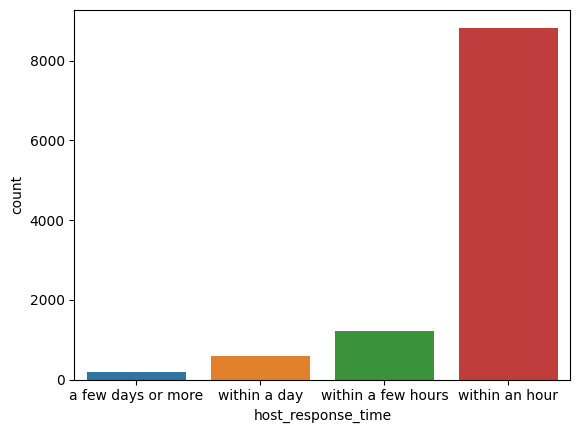

In [112]:
sns.countplot(data=df.sort_values('host_response_time'), x='host_response_time', )

- Response rate  
Changing datatype to int  
Temporarily sort by ascending values for visualization

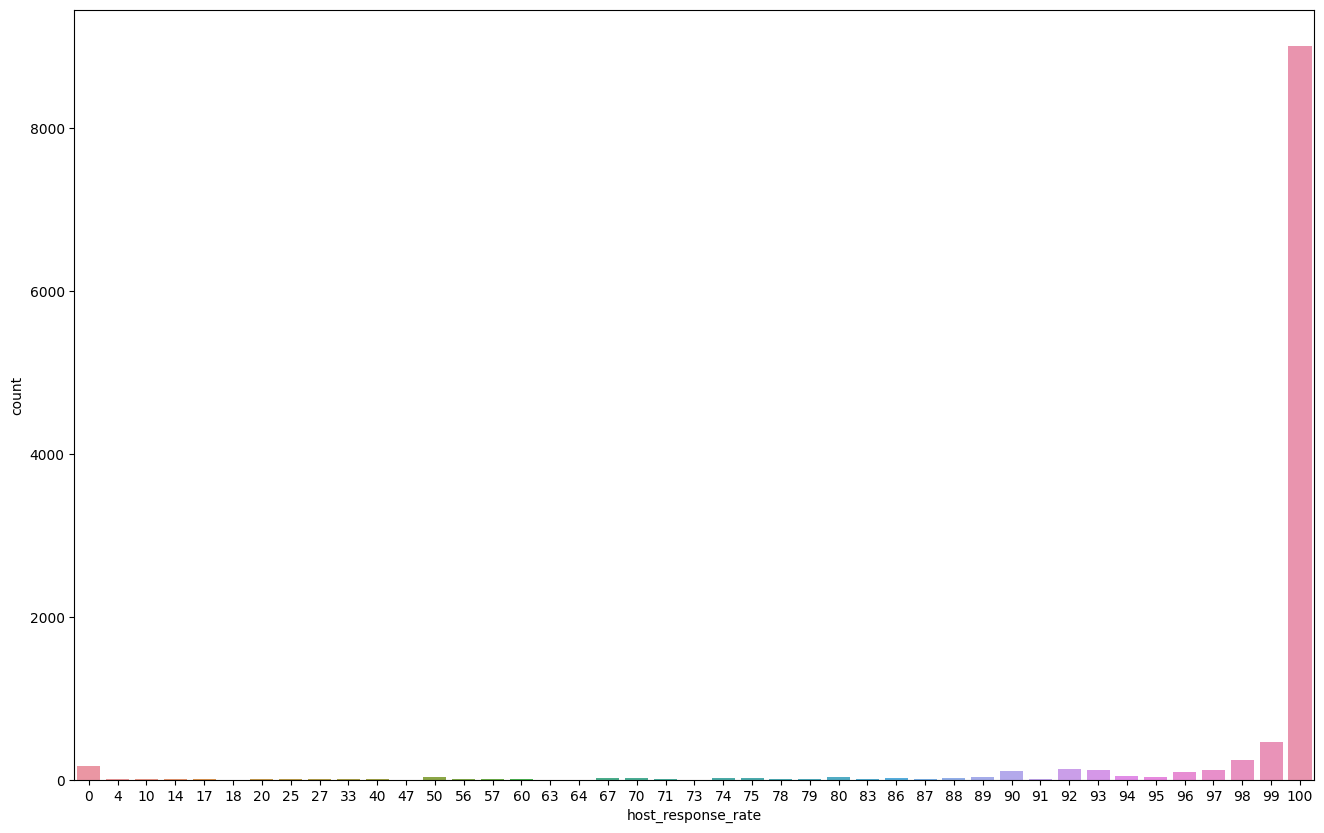

In [113]:
df['host_response_rate'] = df['host_response_rate'].astype(int)
g = sns.countplot(data=df.sort_values('host_response_rate'), x= 'host_response_rate', )
g.figure.set_size_inches(16, 10)


- Superhostness  
Superhost column has 't' for true and 'f' for false, replace those for visualization  

true     5810
false    5006
Name: host_is_superhost, dtype: int64


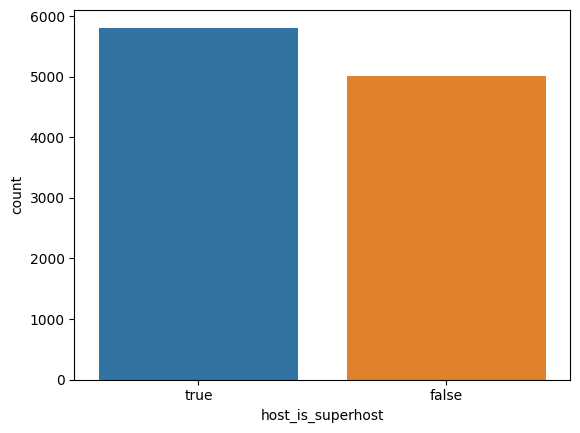

In [114]:
df['host_is_superhost'] = df['host_is_superhost'].replace({'t': 'true', 'f': 'false'})
sns.countplot(data=df, x ='host_is_superhost',  )
#print(df[df['host_is_superhost'] == 'true'].count())
print(df['host_is_superhost'].value_counts())


Conclusions from visualizations  
We can see that the vast majority of hosts:
- responses within an hour.  
- responses to all all messages.  
**but** being superhost is somewhat equally distributed.  